 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [79]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [80]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

read_whales = pd.read_csv(whale_returns_csv)
read_whales.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [81]:
# count
read_whales.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [82]:
# drop null 
read_whales.dropna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [83]:
# Reading algorithmic returns
# YOUR CODE HERE
algo_returns_csv = Path("Resources/algo_returns.csv")

read_algo = pd.read_csv(algo_returns_csv)
read_algo.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [84]:
# Count nulls
# YOUR CODE HERE
read_algo.isna().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [85]:
# Drop nulls
# YOUR CODE HERE
read_algo.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [86]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")


# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [87]:
# Check Data Types

# YOUR CODE HERE
sp500_df.dtypes


Date     object
Close    object
dtype: object

In [88]:
# Fix Data Types


# YOUR CODE HERE
close_df = sp500_df['Close'].str.replace('$', '')
sum_close = close_df.astype('float')

sum_close.sum()

3552406.83

In [89]:
# Calculate Daily Returns

# YOUR CODE HERE
sp500_daily_returns = sum_close.pct_change()

In [90]:
# Drop nulls

# YOUR CODE HERE
sp500_daily_returns.dropna()

1      -0.008764
2      -0.001011
3      -0.001577
4       0.002279
5      -0.000509
          ...   
1644    0.003469
1645    0.000322
1646   -0.007123
1647   -0.003611
1648   -0.000872
Name: Close, Length: 1648, dtype: float64

In [91]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns.rename_axis('Hello')

Hello
0            NaN
1      -0.008764
2      -0.001011
3      -0.001577
4       0.002279
          ...   
1644    0.003469
1645    0.000322
1646   -0.007123
1647   -0.003611
1648   -0.000872
Name: Close, Length: 1649, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [92]:
# Concatenate all DataFrames into a single DataFrame
returns_df = [sp500_daily_returns, read_algo.dropna(), read_whales.dropna()]
# YOUR CODE HERE
concat_frames = pd.concat(returns_df, axis='columns', join='inner')
concat_frames.head()

,Close,Date,Algo 1,Algo 2,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
6,0.000630,2014-06-05,0.004062,0.013285,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
7,-0.006566,2014-06-06,0.001857,0.008284,2015-03-11,0.004012,0.005163,0.003312,-0.001147
8,-0.000038,2014-06-09,-0.005012,0.005668,2015-03-12,0.008265,0.010272,0.013117,0.010801
9,-0.003466,2014-06-10,0.004406,-0.000735,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142
10,0.006105,2014-06-11,0.004760,-0.003761,2015-03-16,0.007901,0.003583,0.007953,0.008055


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

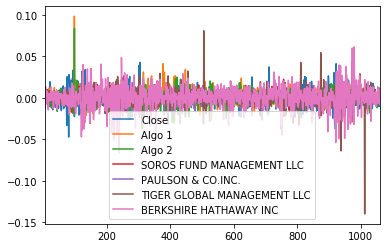

In [93]:
# Plot daily returns
# YOUR CODE HERE
day_return_plot = concat_frames.plot(legend=True)

In [94]:
# Plot cumulative returns
# YOUR CODE HERE
#cum_returns = ((concat_frames+1).cumprod()-1).iloc[-1]
#cum_returns.plot()

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

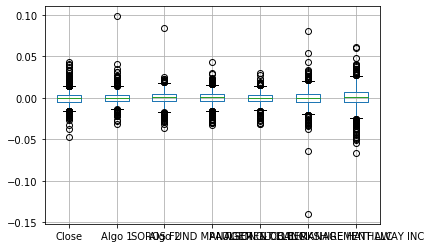

In [95]:
# Box plot to visually show risk
# YOUR CODE HERE
concat_frames.boxplot()

In [96]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?( Tiger, Berkshire are more risky than S&P)
Stdrd_dev_Std = concat_frames.std()
# YOUR CODE HERE
Stdrd_dev_Std

Close                          0.008553
Algo 1                         0.007745
Algo 2                         0.008265
SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
dtype: float64

In [97]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
"Both Tiger Global Management & Berkshire Hathaway are more risky portfolios compared to S&P500"

'Both Tiger Global Management & Berkshire Hathaway are more risky portfolios compared to S&P500'

In [98]:
# Calculate the annualized standard deviation (252 trading 
yearly_Std = Stdrd_dev_Std*np.sqrt(252)
# YOUR CODE HERE
Stdrd_dev_Std

Close                          0.008553
Algo 1                         0.007745
Algo 2                         0.008265
SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

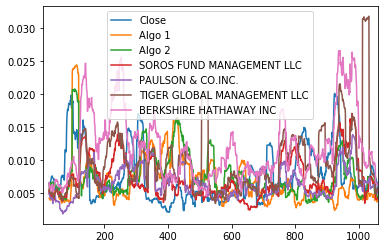

In [99]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
concat_frames.rolling(window=21).std().plot()
# YOUR CODE HERE

In [100]:
# Correlation
# YOUR CODE HERE
cat_correlation = concat_frames.corr()
# YOUR CODE HERE
cat_correlation


,Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Close,1.000000,-0.020353,-0.028751,-0.036216,-0.020471,0.032741,-0.002710
Algo 1,-0.020353,1.000000,0.327996,-0.013205,-0.030506,-0.014538,-0.005687
Algo 2,-0.028751,0.327996,1.000000,-0.003091,-0.026532,-0.039470,-0.025006
SOROS FUND MANAGEMENT LLC,-0.036216,-0.013205,-0.003091,1.000000,0.700191,0.561548,0.754025
PAULSON & CO.INC.,-0.020471,-0.030506,-0.026532,0.700191,1.000000,0.435163,0.545549
TIGER GLOBAL MANAGEMENT LLC,0.032741,-0.014538,-0.039470,0.561548,0.435163,1.000000,0.424908
BERKSHIRE HATHAWAY INC,-0.002710,-0.005687,-0.025006,0.754025,0.545549,0.424908,1.000000


In [101]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

# YOUR CODE HERE

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [102]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [103]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
SP_ratios = (concat_frames.mean() * 252) / yearly_Std
# YOUR CODE HERE
SP_ratios

Close                         -0.535728
Algo 1                         1.070733
Algo 2                         0.804573
SOROS FUND MANAGEMENT LLC      0.367157
PAULSON & CO.INC.             -0.470044
TIGER GLOBAL MANAGEMENT LLC   -0.113992
BERKSHIRE HATHAWAY INC         0.633782
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

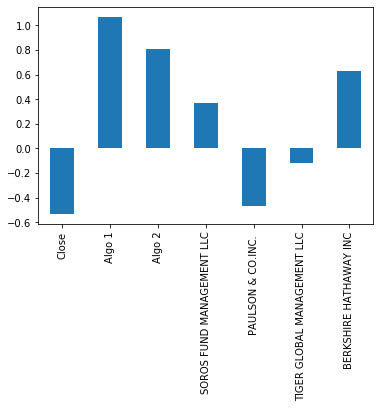

In [104]:
#  # plot() these sharpe ratios using a barplot.
# YOUR CODE HERE
SP_ratios.plot.bar()
 # On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [105]:
# Read the first stock
AAPL_Data = Path("Resources/aapl_historical.csv")

# YOUR CODE HERE
AAPL_df = pd.read_csv(AAPL_Data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

# YOUR CODE HERE
AAPL_df.rename(columns={"NOCP": "AAPL NOCP"}, inplace = True)


# YOUR CODE HERE
washed_AAPL = AAPL_df.drop(columns=['Symbol'])


# YOUR CODE HERE
washed_AAPL.head()

,AAPL NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [106]:
# Read the second stock
# YOUR CODE HERE
GOOG_Data = Path("Resources/goog_historical.csv")

# YOUR CODE HERE
GOOG_df = pd.read_csv(GOOG_Data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


# YOUR CODE HERE
GOOG_df.rename(columns={"NOCP": "GOOG NOCP"}, inplace = True)

# YOUR CODE HERE
washed_GOOG = GOOG_df.drop(columns=['Symbol'])

# YOUR CODE HERE
washed_GOOG.head()

,GOOG NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [107]:
# Read the third stock
COST_Data = Path("Resources/cost_historical.csv")
COST_df = pd.read_csv(COST_Data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
COST_df.rename(columns={"NOCP": "COST NOCP"}, inplace = True)
washed_COST = COST_df.drop(columns=['Symbol'])
# YOUR CODE HERE
washed_COST.head()

,COST NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [108]:
# Concatenate all stocks into a single DataFrame
Stocks = [washed_AAPL, washed_COST, washed_GOOG]
Stocks_df = pd.concat(Stocks, axis='columns', join='inner')
# YOUR CODE HERE
Stocks_df.head()

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [109]:
# Reset the index
Stocks_df.sort_index(inplace=True)
# YOUR CODE HERE
Stocks_df.head()

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [110]:
# Drop Nulls
Stocks_df.dropna()
# YOUR CODE HERE

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [111]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
Shares_stock_Weights = Stocks_df.pct_change().dot(weights)
# YOUR CODE HERE
Shares_stock_Weights.dropna()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [112]:
# YOUR CODE HERE
cong_df = [Shares_stock_Weights.dropna(), concat_frames]
# YOUR CODE HERE
final_cong_df = pd.concat(cong_df, axis='columns', join='inner')
# YOUR CODE HERE
final_cong_df.rename(columns={'Unnamed: 0':'My Portfolio Returns'}, inplace = True)



final_cong_df.head()

,0,Close,Date,Algo 1,Algo 2,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC


In [113]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


final_cong_df.dropna()

,0,Close,Date,Algo 1,Algo 2,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

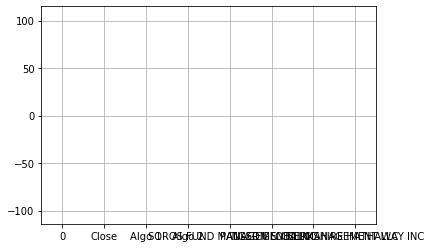

In [114]:
# Risk
# YOUR CODE HERE
final_cong_df.boxplot()

In [115]:
# Rolling
# YOUR CODE HERE

In [116]:
# Beta

In [117]:
# Annualzied Sharpe Ratios
portfolio_std = final_cong_df.std()
yearly_Std = portfolio_std*np.sqrt(252)


yearly_Sharpe_ratios = (final_cong_df.mean() * 252) / yearly_Std
yearly_Sharpe_ratios
# YOUR CODE HERE

0                             NaN
Close                         NaN
Date                          NaN
Algo 1                        NaN
Algo 2                        NaN
Date                          NaN
SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
dtype: float64

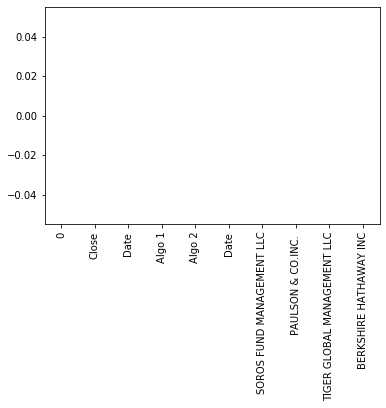

In [118]:
# Visualize the sharpe ratios as a bar plot

yearly_Sharpe_ratios.plot.bar()
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [119]:
#

# YOUR CODE HERE
final_cong_df.corr()

,0,Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOROS FUND MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
